<a href="https://colab.research.google.com/github/yueguo1997/SNA_recommender_system/blob/main/EDA_on_slaes_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
from google.colab import drive
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import torch
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
cur_path = "/content/drive/My Drive/SNA final project/"
os.chdir(cur_path)
!pwd
     

/content/drive/My Drive/SNA final project


# Read the data

In [7]:
G_train = nx.read_graphml("train.graphml")
G_test = nx.read_graphml("test.graphml")

### Basic statistics

In [9]:
s_train = len([n for n, attr in G_train.nodes(data=True) if attr['type'] == 'seller'])
b_train = len([n for n, attr in G_train.nodes(data=True) if attr['type'] == 'buyer'])
i_train = len([n for n, attr in G_train.nodes(data=True) if attr['type'] == 'item'])



In [10]:
nodes_type = ['buyer', 'item', 'seller']

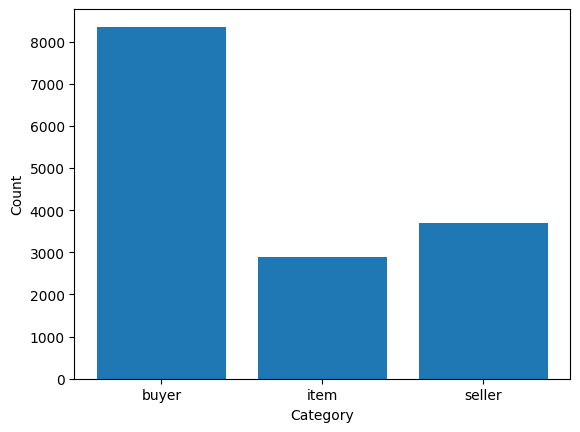

In [12]:
# Plot a histogram with counts for each gender
plt.bar(nodes_type, [b_train,i_train,s_train])
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [ ]:
# popular nodes

In [37]:
nodes_i = [node for node in G_train.nodes if G_train.nodes[node]["type"] == "item"]
edges_b = [(u, v) for (u, v, d) in G_train.edges(data=True) if d["type"] == "buys"]
nodes_s = [node for node in G_train.nodes if G_train.nodes[node]["type"] == "seller"]
nodes_b = [node for node in G_train.nodes if G_train.nodes[node]["type"] == "buyer"]
edges_s = [(u, v) for (u, v, d) in G_train.edges(data=True) if d["type"] == "sold_by"]

In [19]:
items_count = {}
for u,v in edges_b:
  if u in nodes_i:
    try: 
      items_count[u] += 1
    except:
      items_count[u] = 1
  elif v in nodes_i:
    try: 
      items_count[v] += 1
    except:
      items_count[v] = 1

popular_items = sorted(items_count.items(),key = lambda x: x[1],reverse = True)


In [25]:
items = [item[0] for item in popular_items]
items_buy_count = [item[1] for item in popular_items]

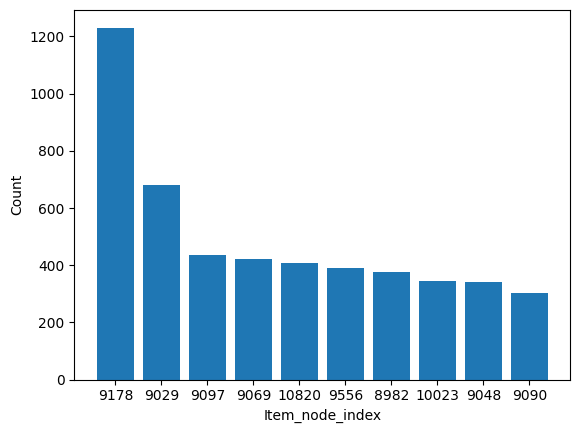

In [26]:
plt.bar(items[:10],items_buy_count[:10])
plt.xlabel('Item_node_index')
plt.ylabel('Count')
plt.show()

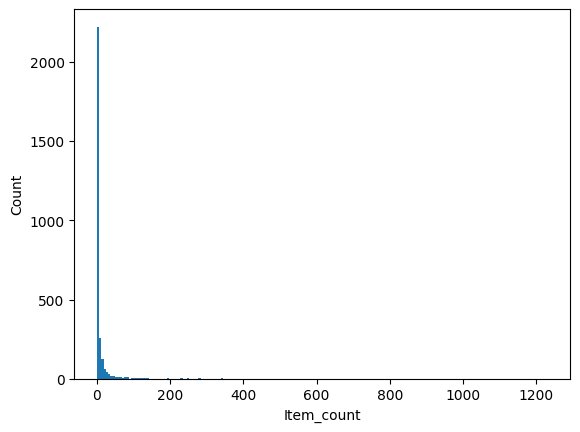

In [35]:
plt.hist(items_buy_count,bins = 200)
plt.xlabel('Item_count')
plt.ylabel('Count')
plt.show()

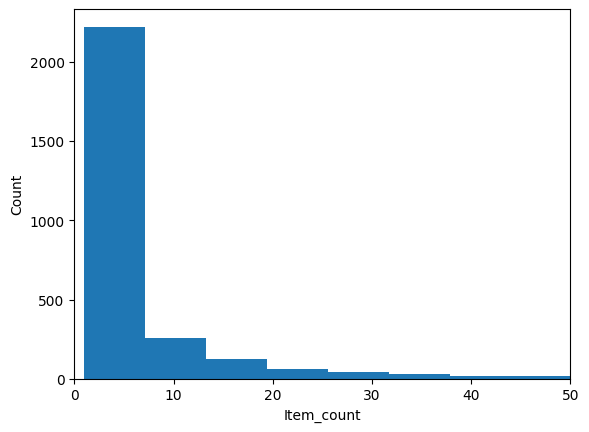

In [36]:
plt.hist(items_buy_count,bins = 200)
plt.xlabel('Item_count')
plt.ylabel('Count')
plt.xlim((0,50))
plt.show()

In [24]:
# popular_seller

In [38]:
seller_count = {}
for u,v in edges_s:
  if u in nodes_s:
    try: 
      seller_count[u] += 1
    except:
      seller_count[u] = 1
  elif v in nodes_s:
    try: 
      seller_count[v] += 1
    except:
      seller_count[v] = 1

popular_sellers = sorted(seller_count.items(),key = lambda x: x[1],reverse = True)

In [39]:
sellers = [item[0] for item in popular_sellers]
sellers_buy_count = [item[1] for item in popular_sellers]

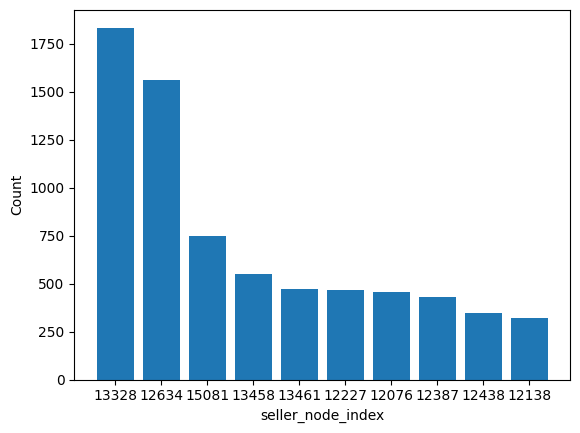

In [40]:
plt.bar(sellers[:10],sellers_buy_count[:10])
plt.xlabel('seller_node_index')
plt.ylabel('Count')
plt.show()

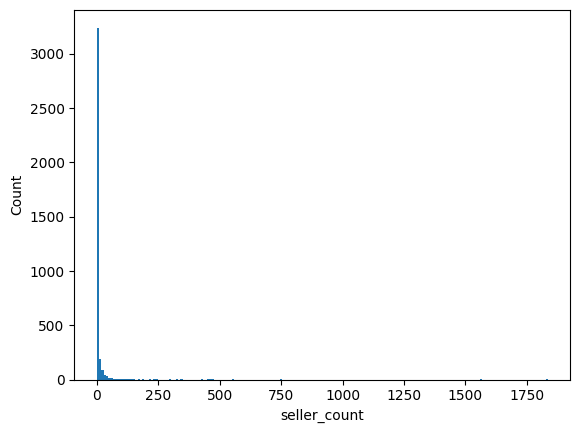

In [41]:
plt.hist(sellers_buy_count,bins = 200)
plt.xlabel('seller_count')
plt.ylabel('Count')
plt.show()

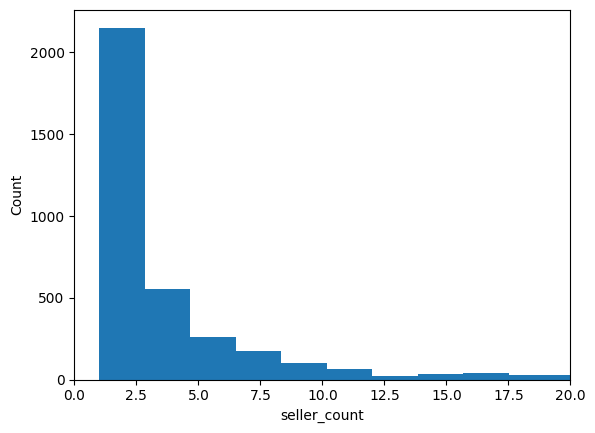

In [46]:
plt.hist(sellers_buy_count,bins = 1000)
plt.xlabel('seller_count')
plt.ylabel('Count')
plt.xlim((0,20))
plt.show()

In [47]:
# statistics on users

In [55]:
user_count = {}
for u,v in edges_b:
  if u in nodes_b:
    try: 
      user_count[u] += 1
    except:
      user_count[u] = 1
  elif v in nodes_b:
    try: 
      user_count[v] += 1
    except:
      user_count[v] = 1

popular_users = sorted(user_count.items(),key = lambda x: x[1],reverse = True)

In [56]:
users = [item[0] for item in popular_users]
users_buy_count = [item[1] for item in popular_users]

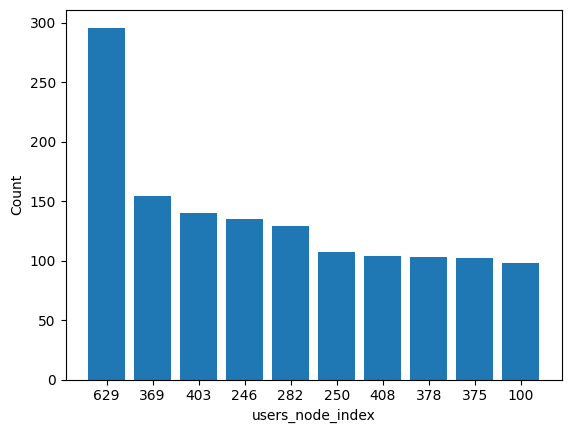

In [58]:
plt.bar(users[:10],users_buy_count[:10])
plt.xlabel('users_node_index')
plt.ylabel('Count')
plt.show()

(0.0, 50.0)

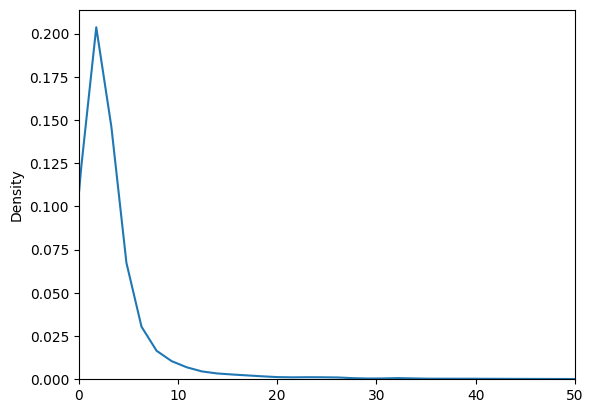

In [52]:
sns.kdeplot(users_buy_count)
plt.xlim(0,50)